# Last time

We covered: Slicing, images, histograms.

In particular, recall how slicing works with lists: 

In [1]:
xs = [0,1,2,3]
ys = xs[0:2]
print 'xs =', xs, 'ys =', ys
ys[0] = 999
print 'xs =', xs, 'ys =', ys

xs = [0, 1, 2, 3] ys = [0, 1]
xs = [0, 1, 2, 3] ys = [999, 1]


On the other hand, with numpy arrays:

In [2]:
import numpy as np 
X = np.array([0,1,2,3])
Y = X[0:2]
print 'X =', X, 'Y =', Y
Y[0] = 999
print 'X =', X, 'Y =', Y

X = [0 1 2 3] Y = [0 1]
X = [999   1   2   3] Y = [999   1]


In lists, slicing always makes a fresh copy, whereas for numpy arrays, slicing makes a reference to that part of the array. This makes sense because if you have some huge dataset, you don't want to copy the whole dataset when you want to look at a slice of it. 

# Randomness

Randomness is used a lot both in mathematics and the real world.

Generally, a random number comes from a probability distribution. 

The distribution might be discrete: i.e. 
it comes from a set 

$$ \{ (x_1, p_1), ..., (x_n, p_n) \},$$

where you get outcome $x_i$ with probability $p_i$. It is assumed that $\sum_i p_i = 1$ (if not you normalize the p's so their sum is 1). The function that takes $x_i \mapsto p_i$ is called the *probability mass function*.

For continuous random numbers, one normally uses a * probability density function*, e.g., 

$$ p(x) = \frac{1}{\sqrt{2\pi}\sigma}\exp\left({-\frac{1}{2}\left(\frac{x}{\sigma}\right)^2}\right)$$

The probability of a random number from this distribution being in the interval $[a,b]$ is then:

$$\int_a^b p(x)dx$$

The best known distributions are the uniform distribution and the normal distribution. 

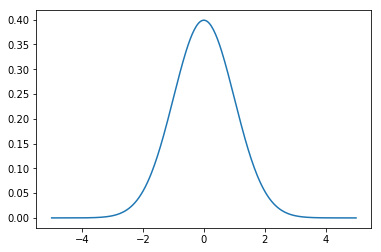

In [3]:
# let's graph the density function of the normal distribution.
import matplotlib.pyplot as plt
%matplotlib inline
from math import pi, sqrt, e
X = np.linspace(-5,5,300)
Y = 1/sqrt(2*pi)*e**(-0.5*X*X)
plt.plot(X, Y)

The easiest distribution to understand is the uniform distribution: all numbers in a given range are equally likely. In python the function `random.random()` will produce a random number in $(0,1)$.

In [4]:
import random
random.seed(42)  #optional: the seed will initialize the random number generator
for i in range(15):
    print random.random()

0.639426798458
0.0250107552227
0.275029318369
0.223210738149
0.736471214164
0.676699487423
0.892179567705
0.0869388326294
0.421921819685
0.0297972194381
0.218637974804
0.505355288103
0.0265359696839
0.198837650687
0.64988443778


How would we turn this into random numbers from a to b?

In [5]:
def rnum(a,b):
    return a + (b-a)*random.random()

for i in range(10):
    print rnum(-1,1)

0.0898829612064
-0.559118755919
0.178531367752
0.618860913356
-0.987002480644
0.611638503666
0.396278789976
-0.319498966964
-0.689041000376
0.914426144414


You can use numpy to create numpy arrays with random numbers: 

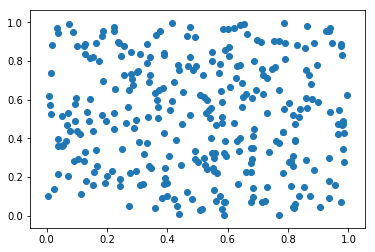

In [6]:
N = 300
X = np.random.uniform(low=0,high=1,size=N)
Y = np.random.uniform(low=0,high=1,size=N)
plt.scatter(X,Y)

What if we wanted to wanted to add some randomness to an otherwise deterministic (non-random) function?

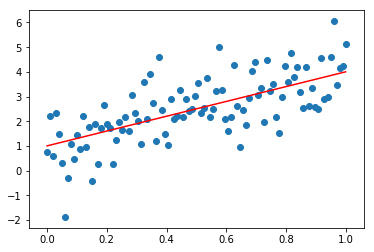

In [7]:
X = np.linspace(0,1,100)
Y = 3 * X + 1 # line
plt.plot(X, Y, "r") # line plot

Z = Y + np.random.normal(0,1,len(X)) # add some noise to the line
plt.scatter(X, Z) # scatter plot

Getting the average of a bunch of random integers:

In [8]:
N = 20000
X = np.zeros(N)
for i in range(N):
    X[i] = random.randint(1, 6)   # from 1 to 6 inclusive

print 'random integers:', X
print 'average of random integers:', np.mean(X)

random integers: [ 3.  1.  1. ...,  5.  6.  5.]
average of random integers: 3.50185


# Sampling from the normal distribution

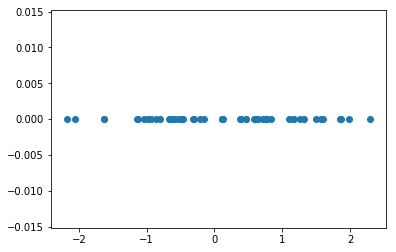

In [9]:
N = 50
X = np.zeros(N)
mu = 0.0
sigma = 1.0
for i in range(N):
    X[i] = random.gauss(mu, sigma)

plt.scatter(X, np.zeros(N))

We can also use the numpy library to sample from the normal distribution: 

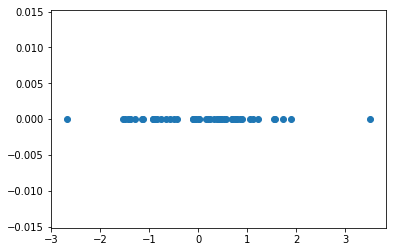

In [10]:
N = 50
mu = 0.0
sigma = 1.0
X = np.random.normal(loc=mu, scale=sigma, size=N)
plt.scatter(X, np.zeros(N))

Looks like the points are more concentrated around zero than away from zero. How can we see it better? Histogram.

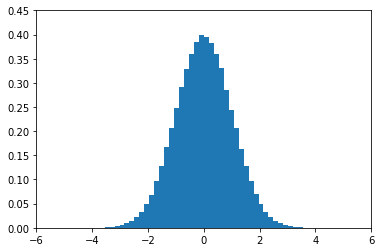

In [11]:
N = 500000
mu = 0.0
sigma = 1.0
X = np.random.normal(loc=mu, scale=sigma, size=N)
plt.axis([-6, 6, 0, 0.45])
_,_,_ = plt.hist(X, 50, normed=True) 
# if you omit '_,_,_ =', then the output of plt.hist will be printed below,
# which is not what I want

Sigma is the standard deviation, which measures how wide the normal distribution is. For example:

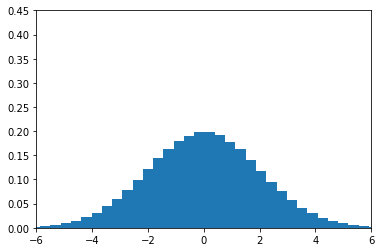

In [12]:
N = 500000
mu = 0.0
sigma = 2.0  # larger standard deviation
X = np.random.normal(loc=mu, scale=sigma, size=N)
plt.axis([-6, 6, 0, 0.45])
_,_,_ = plt.hist(X, 50, normed=True)

The shape is the same, but compare the y-axis numbers in the two graphs above. 

You can compute the mean and standard deviation of any data:

In [13]:
print 'mean = ', np.mean(X)
print 'std dev = ', np.std(X)

mean =  0.00191655889184
std dev =  2.00103927719


In general, if `X` is my data-set, then the normal distribution with `mu = np.mean(X)`, and `sigma = np.std(X)` will fit the data best.

A useful rule of thumb: If a data distribution is normal then **about 68 percent of the data values are within one standard deviation of the mean**.

We've seen a histogram of the normal distribution. What does the histogram of the uniform distribution look like? 

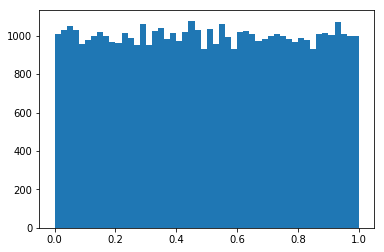

In [14]:
N = 50000
X = np.random.uniform(low=0, high=1, size=N)
_, _, _ = plt.hist(X, 50)